In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [2]:
n = 600 # number of problems
m = 20 # problem types
k = 25 # students


In [3]:
R = np.random.randint(low=0,high=10,dtype='int32',size=[n,k])

In [4]:
# R là kết quả của k students với n problems
R.shape

(600, 25)

In [5]:
# Kết quả của student với i = 10
R[:,10-1]

array([8, 0, 0, 0, 5, 6, 2, 4, 8, 3, 8, 1, 9, 7, 1, 8, 2, 9, 1, 1, 6, 2, 2,
       0, 1, 6, 3, 6, 0, 8, 4, 6, 4, 0, 4, 2, 6, 1, 1, 3, 5, 4, 5, 8, 6, 3,
       4, 0, 9, 3, 9, 3, 1, 0, 7, 2, 3, 5, 6, 0, 9, 9, 8, 1, 0, 7, 9, 9, 7,
       0, 1, 7, 4, 2, 3, 1, 7, 7, 0, 0, 7, 6, 2, 0, 5, 1, 8, 6, 8, 0, 3, 8,
       0, 2, 6, 2, 3, 1, 9, 3, 8, 9, 3, 8, 4, 7, 3, 5, 7, 8, 7, 8, 1, 2, 6,
       1, 0, 4, 2, 8, 9, 9, 7, 6, 2, 4, 4, 7, 2, 5, 5, 1, 9, 6, 4, 5, 5, 6,
       3, 5, 4, 8, 3, 3, 2, 8, 9, 1, 6, 1, 0, 0, 7, 7, 7, 0, 5, 0, 2, 5, 0,
       1, 1, 9, 9, 8, 4, 9, 3, 7, 4, 2, 0, 9, 3, 0, 7, 9, 5, 1, 1, 4, 2, 3,
       4, 9, 7, 8, 7, 1, 2, 5, 3, 4, 3, 0, 2, 7, 9, 1, 2, 0, 2, 3, 8, 9, 0,
       4, 5, 9, 6, 1, 1, 9, 7, 5, 2, 7, 0, 6, 5, 3, 9, 6, 6, 4, 5, 3, 4, 3,
       6, 7, 1, 2, 4, 4, 4, 7, 6, 9, 6, 2, 7, 4, 3, 6, 1, 4, 8, 2, 3, 4, 2,
       2, 9, 2, 9, 9, 1, 5, 6, 7, 2, 9, 3, 3, 5, 9, 2, 9, 2, 5, 2, 3, 2, 4,
       4, 1, 4, 0, 5, 9, 0, 5, 2, 8, 3, 5, 2, 3, 1, 2, 4, 5, 6, 1, 7, 6, 8,
       1, 4,

In [6]:
number_problems_per_type = np.ones(m,dtype='int32') * int((n/m))  # Coi như số bài mỗi dạng là như nhau  

In [7]:
number_problems_per_type[0]

30

In [9]:
# P : k*m là ma trận điểm số của k student cho m dạng bài 
P = np.zeros([k,m],dtype='float32') # chưa tính giá trị
P.shape

(25, 20)

In [10]:
R[:number_problems_per_type[0],:].sum(axis=0) # Kết quả dạng bài đầu tiên (20 problems) của tất cả students

array([129, 133, 133, 134, 112, 123, 129, 151, 150, 117, 105, 133,  98,
       130, 124, 140, 168, 124, 159, 139, 138, 130, 136, 122, 149])

In [11]:
P[:,0].shape

(25,)

In [14]:
# Tính tổng điểm của m problem type cho k student
start = 0
for i in range(m):
    quantity = number_problems_per_type[i]
    # print(quantity)
    P[:,i] = (R[start:start+quantity, : ].sum(axis=0))
    start+=quantity

In [16]:
# Kết quả của tất cả student ở dạng bài đầu tiên : OK
P[:,0]

array([ 129.,  133.,  133.,  134.,  112.,  123.,  129.,  151.,  150.,
        117.,  105.,  133.,   98.,  130.,  124.,  140.,  168.,  124.,
        159.,  139.,  138.,  130.,  136.,  122.,  149.], dtype=float32)

In [15]:
# Kết quả của student i = 0 với m dạng bài :
P[0,:]

array([ 129.,  123.,  169.,  131.,  121.,  145.,  135.,  141.,  120.,
        158.,  122.,  143.,  134.,  130.,  132.,  135.,  101.,  134.,
        129.,  147.], dtype=float32)

In [19]:
TotalResult = P.sum(axis=1) # Tổng kết quả của tất cả students 

In [21]:
print(TotalResult)
print("Student index i = ",np.argmax(TotalResult)," has highest score overall")

[ 2679.  2649.  2650.  2863.  2677.  2688.  2695.  2778.  2739.  2689.
  2600.  2635.  2541.  2782.  2767.  2738.  2698.  2732.  2711.  2756.
  2577.  2775.  2778.  2634.  2796.]
Student index i =  3  has highest score overall


In [22]:
x1 = np.zeros(k)
x1[1]=1
x1[3]=1
x1[5]=1

In [23]:
x1

array([ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [24]:
np.dot(x1,P)/3 # kết quả team với 3 thành viên 1,3,5 

array([ 130.        ,  139.33333333,  132.66666667,  137.66666667,
        129.        ,  142.66666667,  124.        ,  132.66666667,
        131.33333333,  161.66666667,  130.66666667,  133.33333333,
        147.33333333,  126.33333333,  135.        ,  125.33333333,
        144.        ,  138.        ,  150.        ,  142.33333333])

In [25]:
E = np.ones(m)

In [26]:
E # Expected result

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [32]:
def O(x):
    return np.dot(x,P)/(3*30)

In [33]:
O(x1) # OK

array([ 4.33333333,  4.64444444,  4.42222222,  4.58888889,  4.3       ,
        4.75555556,  4.13333333,  4.42222222,  4.37777778,  5.38888889,
        4.35555556,  4.44444444,  4.91111111,  4.21111111,  4.5       ,
        4.17777778,  4.8       ,  4.6       ,  5.        ,  4.74444444])

In [34]:
import scipy.spatial.distance as d

In [81]:
def Objective(x):
    vector_O = O(x)
    return (1 - d.cosine(vector_O,E)) *  np.linalg.norm(vector_O)
# Ban đầu em để d.cosine(vector_O,E), nhưng hàm trên trả về distance, không phải là similarity, phải lấy 1 - đi 

In [82]:
def cosine_sim(v1,v2):
    return np.dot(v1,v2)/(np.linalg.norm(v1) * np.linalg.norm(v2))

In [83]:
def Objective2(x):
    vector_O = O(x)
    return cosine_sim(vector_O,E)*  np.linalg.norm(vector_O)

In [84]:
Objective(x1) - Objective2(x1)

0.0

In [85]:
# Greedy search tìm đồng thời đội có Objective score cao nhất / Đội có total score cao nhất 

Objective_score = []
Total_score = []

team_max_objective = []
team_max_total = []

max_objective = 0
max_total = 0


for first in range(k-2):
    for(second) in range(first+1,k-1):
        for(last) in range(second+1,k):
            x = np.zeros(k)
            x[first] =1
            x[second] = 1
            x[last] = 1
            o_score = Objective(x)            
            Objective_score.append(o_score)
            t_score = R[:,[first,second,last]].sum()
            Total_score.append(t_score)
            if(o_score > max_objective):
                max_objective = o_score
                team_max_objective = [first,second,last]
            if(t_score > max_total):
                max_total = t_score
                team_max_total = [first,second,last]

In [86]:
x = np.zeros(k)
x[team_max_total] = 1
print("Max total : ",max_total," with team : ",team_max_total," team's Objective score :", Objective(x))

Max total :  8441  with team :  [3, 13, 24]  team's Objective score : 20.971833109


In [87]:
print("Max objective : ", max_objective," with team : ", team_max_objective, " team's total score :", R[:,team_max_objective].sum())

Max objective :  20.971833109  with team :  [3, 13, 24]  team's total score : 8441


In [88]:
Objective_score = []
Total_score = []
for first in range(k-2):
    for(second) in range(first+1,k-1):
        for(last) in range(second+1,k):
            x = np.zeros(k)
            x[first] =1
            x[second] = 1
            x[last] = 1
            score = Objective(x)
            Objective_score.append(score)
            Total_score.append(R[:,[first,second,last]].sum())

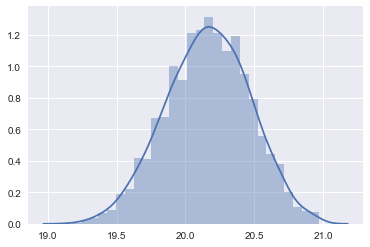

In [89]:
sns.distplot(Objective_score)

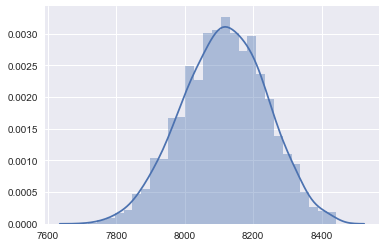

In [90]:
sns.distplot(Total_score)

In [91]:
import pandas as pd

data = pd.DataFrame(
    {
        'x' : Objective_score,
        'y' : Total_score
    }
)


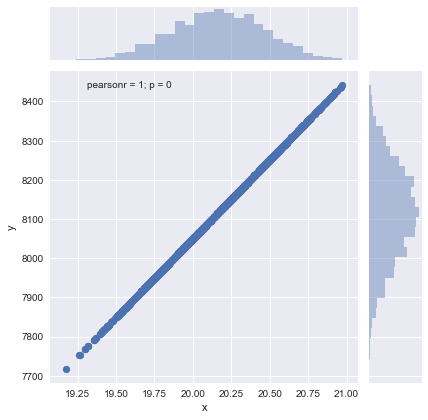

In [92]:
sns.jointplot(x="x",y="y",data=data)

In [97]:
np.corrcoef(Objective_score,Total_score)

array([[ 1.,  1.],
       [ 1.,  1.]])

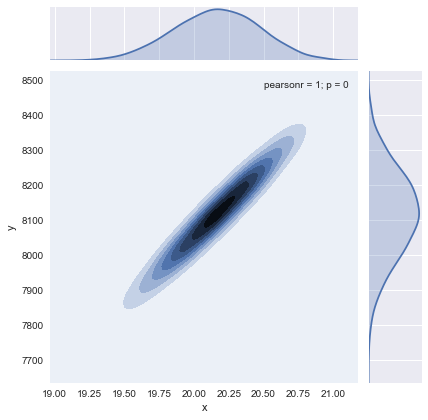

In [93]:
sns.jointplot(x="x",y="y",data=data, kind="kde")

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


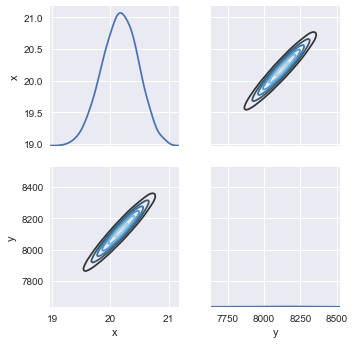

In [96]:
g= sns.PairGrid(data)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot,cmap="Blues_d",n_levels=6)

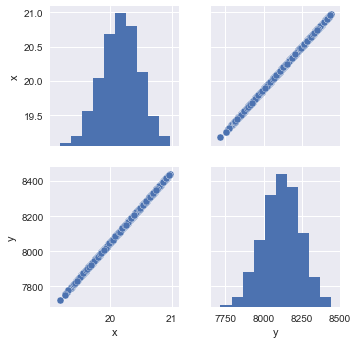

In [95]:
sns.pairplot(data)

Objective function và Total_sum là tương đồng 

# Constructing GAs

### Greedy search khá dễ implement khi số students được chọn là nhỏ 
Tuy vậy khi k lớn cũng như số student được chọn lớn hơn, GAs có thể hoạt động tốt hơn 

In [ ]:
no_selected_students = 3

In [ ]:
class Individual :
    genes = np.zeros(k,dtype='b')
    fitness = 0
    
    def generate_individual(self):
        indices = np.random.randint(low=0,high=k,size=no_selected_students)
        self.genes[indices] = 1
    
    def fitness_value(self):
        return Objective(self.genes)

In [ ]:
class Population:
    individuals = []
    
    def __init__(self,pol_size,init=True):
        self.individuals = [None] * pol_size
        if(init):
            for i in range (pol_size):
                g = Individual()
                g.generate_individual()
                individuals[i] = g
                
    def fittest_indi(self):
        fittest_individual = individuals[0]
        for i in range(len(individuals)):
            if(fittest_individual.fittess_value() <= 
               individuals[i].fitness_value()):
                fittest_individual = individuals[i]
        return fittest_individual
    
    def save_individual(self,index,indvd):
        self.individuals.insert(index,indvd)